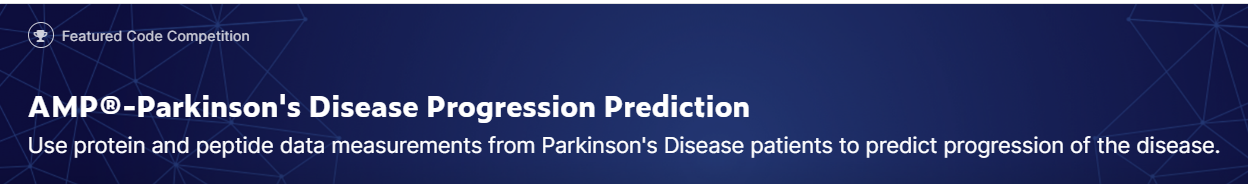


## https://www.kaggle.com/competitions/amp-parkinsons-disease-progression-prediction

# Goal 🥅

- Predict the progression of Parkinson's disease over months

# Datas #

- 3 csv files: train_proteins, train_peptides, train_clinical_data

## train_proteins ##

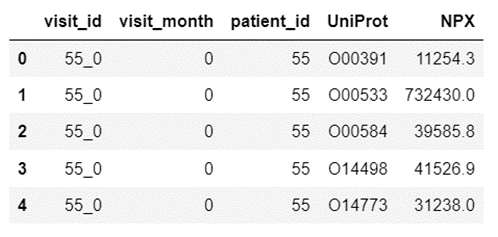

## train_peptides ##

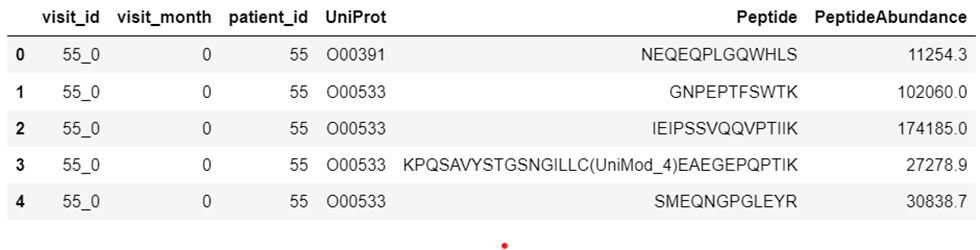

## train_clinical ##

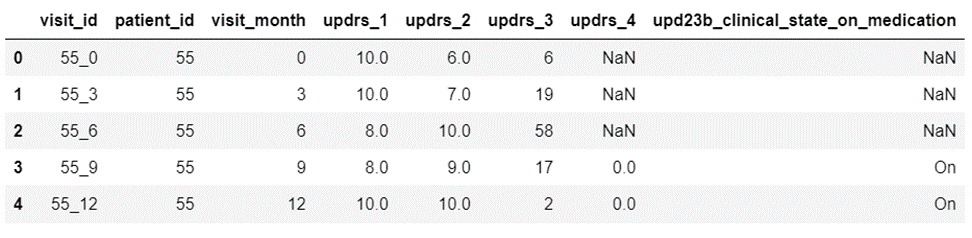


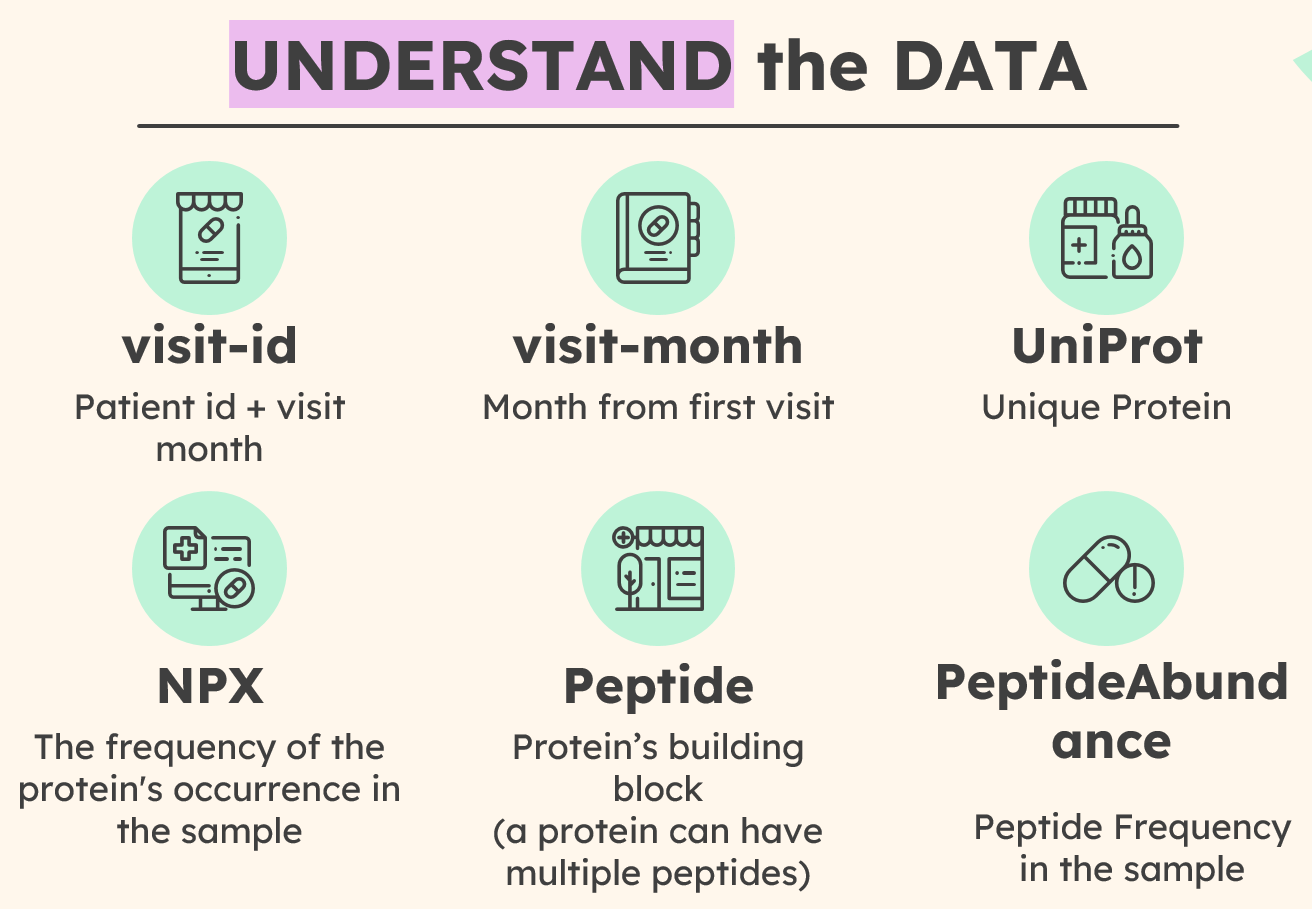

- updrs 1 : Mood


- updrs 2 : Everyday activities


- updrs 3 : Movivation


- updrs 4 : Involuntary movements

# Relationships between features 💑

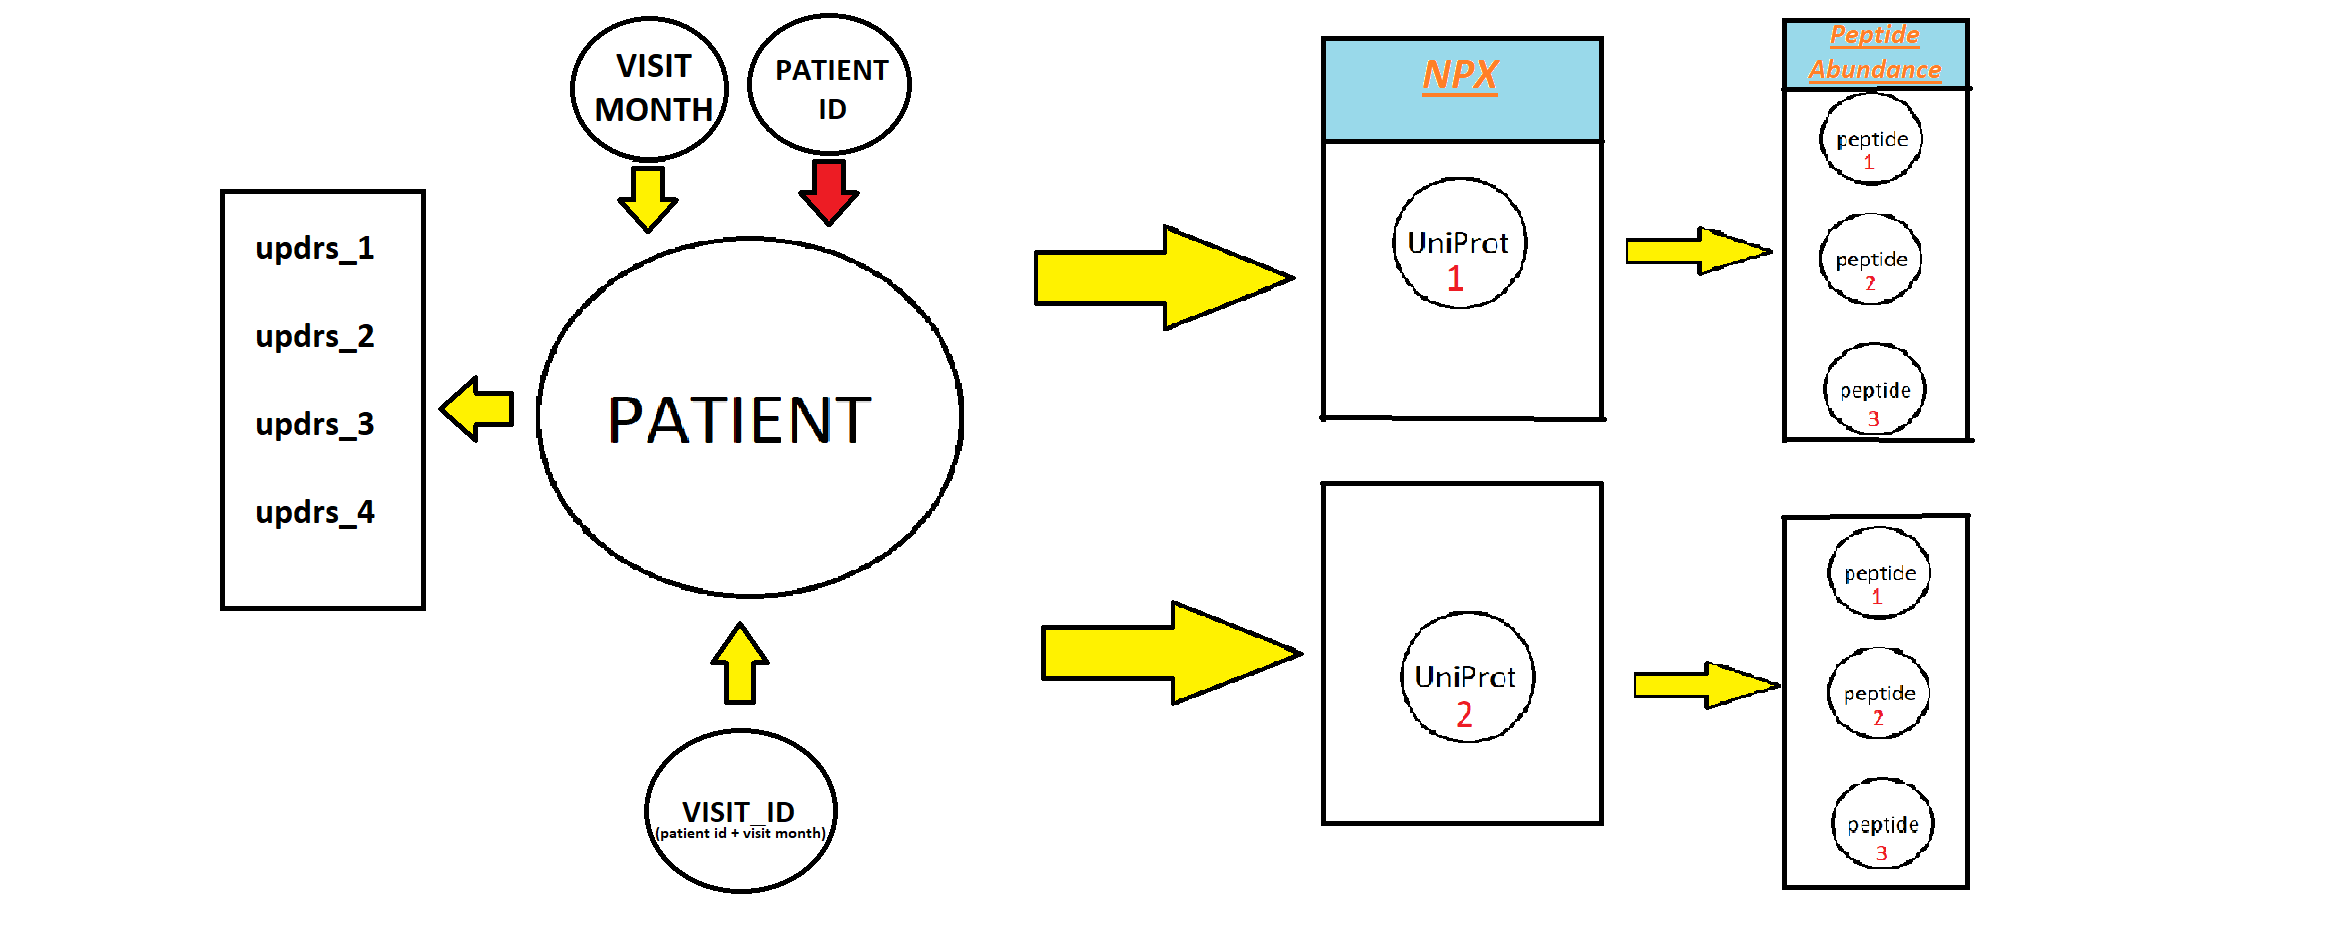

- A **patient** can have multiple **UniProt** --> A **UniProt** can have multiple **Peptide**



- UniProt's amount --> **NPX**, Peptide's amount --> **PeptideAbundance**


- Each time a patient visit (visit_id) : **NPX, PeptideAbundance, updrs** change

# LIBRARIES 📙

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# -------------------------------------------------------------

# IMPORT DATA 📊

In [2]:
train_pep = r'C:\Users\broke\OneDrive\Desktop\amp-pd\train_peptides.csv'
train_pro = r'C:\Users\broke\OneDrive\Desktop\amp-pd\train_proteins.csv'
train_clinical = r'C:\Users\broke\OneDrive\Desktop\amp-pd\train_clinical_data.csv'

In [3]:
train_pep_df = pd.read_csv(train_pep)
train_pro_df = pd.read_csv(train_pro)
train_clinical_df = pd.read_csv(train_clinical)

In [4]:
# Note: 1 patient can have multiple Protein, 1 Protein can have multiple Peptides

In [5]:
bold = '\033[1m'

reset = '\033[0m'

# -------------------------------------------------------------

## Train Protein  🧬

- Unique values

In [6]:
for col in train_pro_df.columns:
    unique_value = train_pro_df[col].nunique()
    print(f"{bold}{col}:{reset} {unique_value}")

visit_id: 1113
visit_month: 15
patient_id: 248
UniProt: 227
NPX: 218795


<AxesSubplot:xlabel='NPX', ylabel='Density'>

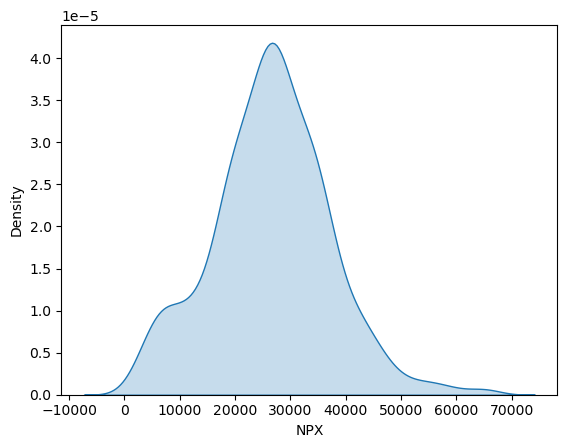

In [7]:
#Has 227 UniProt, we should only plot 1 for example

temp = train_pro_df[train_pro_df['UniProt'] == 'O00584']

sns.kdeplot(temp['NPX'], shade=True)

<AxesSubplot:xlabel='NPX', ylabel='Density'>

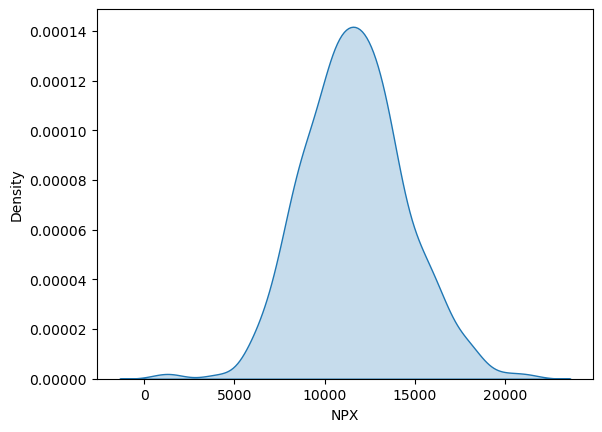

In [8]:
temp = train_pro_df[train_pro_df['UniProt'] == 'O00391']

sns.kdeplot(temp['NPX'], shade=True)

# -------------------------------------------------------------

## Train Peptide 🦠

- Unique values

In [9]:
for col in train_pep_df.columns:
    unique_value = train_pep_df[col].nunique()
    print(f"{bold}{col}:{reset} {unique_value}")

visit_id: 1113
visit_month: 15
patient_id: 248
UniProt: 227
Peptide: 968
PeptideAbundance: 738931


<AxesSubplot:xlabel='PeptideAbundance', ylabel='Density'>

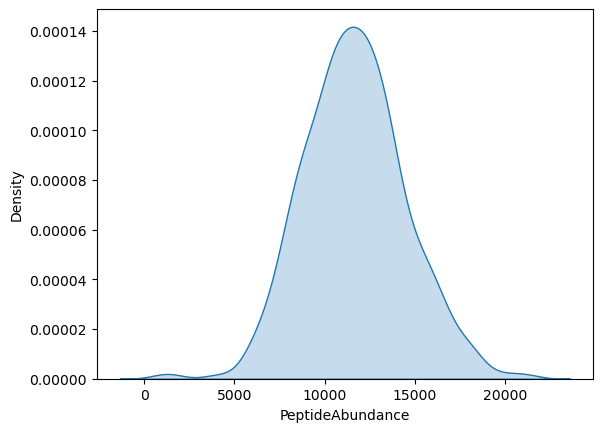

In [10]:
temp = train_pep_df[train_pep_df['Peptide'] == 'NEQEQPLGQWHLS']

sns.kdeplot(temp['PeptideAbundance'], shade=True)

<AxesSubplot:xlabel='PeptideAbundance', ylabel='Density'>

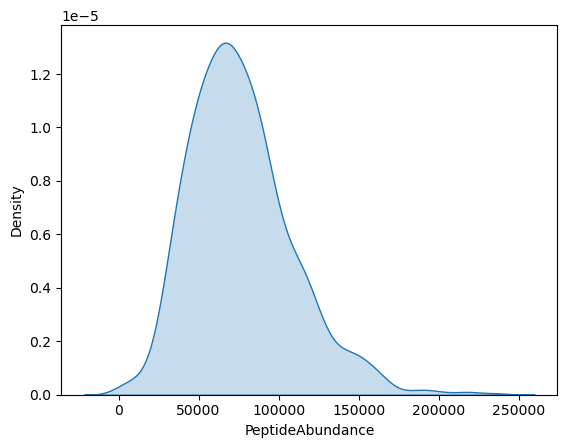

In [11]:
temp = train_pep_df[train_pep_df['Peptide'] == 'GNPEPTFSWTK']

sns.kdeplot(temp['PeptideAbundance'], shade=True)

## Top 3 found 📊

<AxesSubplot:xlabel='UniProt', ylabel='count'>

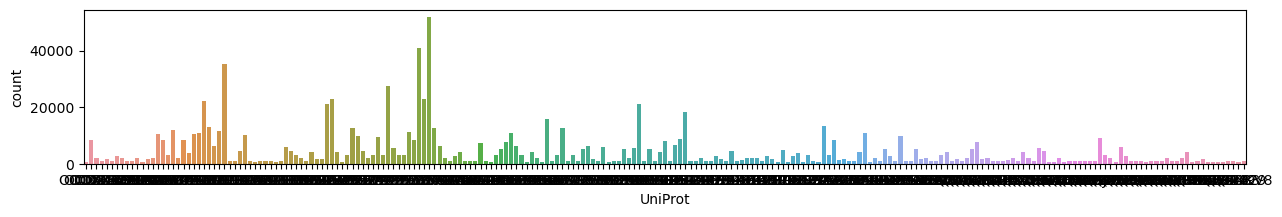

In [12]:
plt.rcParams.update({'figure.figsize':[15,2]})
sns.countplot(data=train_pep_df, x='UniProt')

# 👇

**PO2787**  - Serotransferrin, they transport iron in blood. Study have shown, iron dysregulation have an effect on Parkinson's Patient

**P02768**  - Albumin, low Albumin level in blood is lower in Parkinson's Patient

**P01024**  - Complement C3, plays a role in complement system. Increased level play a role in Parkinson's

# -------------------------------------------------------------

## Train Clinical 🏥

In [13]:
for col in train_clinical_df:
    unique_value = train_clinical_df[col].nunique()
    print(f"{bold}{col}:{reset} {unique_value}")

visit_id: 2615
patient_id: 248
visit_month: 17
updrs_1: 32
updrs_2: 36
updrs_3: 15
updrs_4: 19
upd23b_clinical_state_on_medication: 2


- Group data by visit month and plot how means change over month

In [14]:
month_uprs = train_clinical_df.drop('patient_id', axis=1).groupby('visit_month').mean()
month_uprs.reset_index(level=['visit_month'], inplace = True)
month_uprs

,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
0,0,5.572581,4.439516,6.0,2.047619
1,3,5.513043,6.634783,19.0,0.142857
2,6,7.109375,6.963542,58.0,2.307692
3,9,6.080808,7.204082,17.0,0.488372
4,12,6.222222,5.320988,2.0,1.308271
5,18,7.299465,6.850267,7.0,1.218978
6,24,6.670782,5.658436,16.0,1.658065
7,30,8.231214,7.647399,21.0,1.753425
8,36,7.331858,6.230088,9.0,1.765432
9,42,8.339869,8.372549,4.0,1.868613


Text(0.5, 1.05, 'UPDRS Mean Scores by Visit Month')

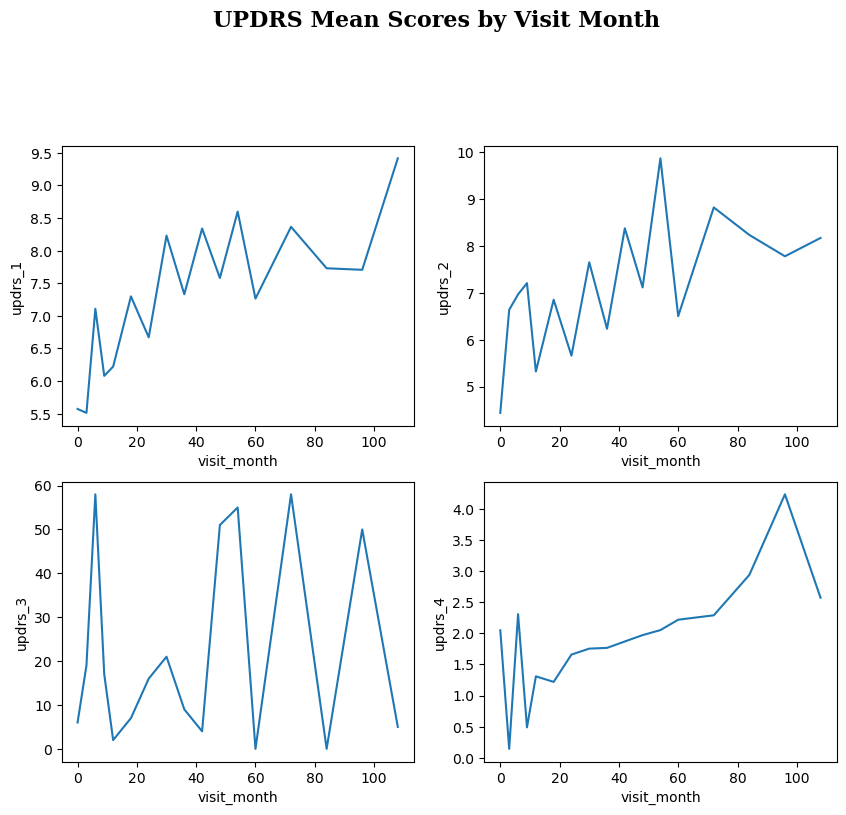

In [15]:
plt.rcParams.update({'figure.figsize':[10,8]})
fig, ax = plt.subplots(ncols=2, nrows=2)
sns.lineplot(data = month_uprs, x='visit_month', y='updrs_1', ax=ax[0,0])
sns.lineplot(data = month_uprs, x='visit_month', y='updrs_2', ax=ax[0,1])
sns.lineplot(data = month_uprs, x='visit_month', y='updrs_3', ax=ax[1,0])
sns.lineplot(data = month_uprs, x='visit_month', y='updrs_4', ax=ax[1,1])
fig.suptitle('UPDRS Mean Scores by Visit Month', fontsize=16, fontweight='bold', fontfamily='serif', y=1.05)

# -------------------------------------------------------------

## MERGE

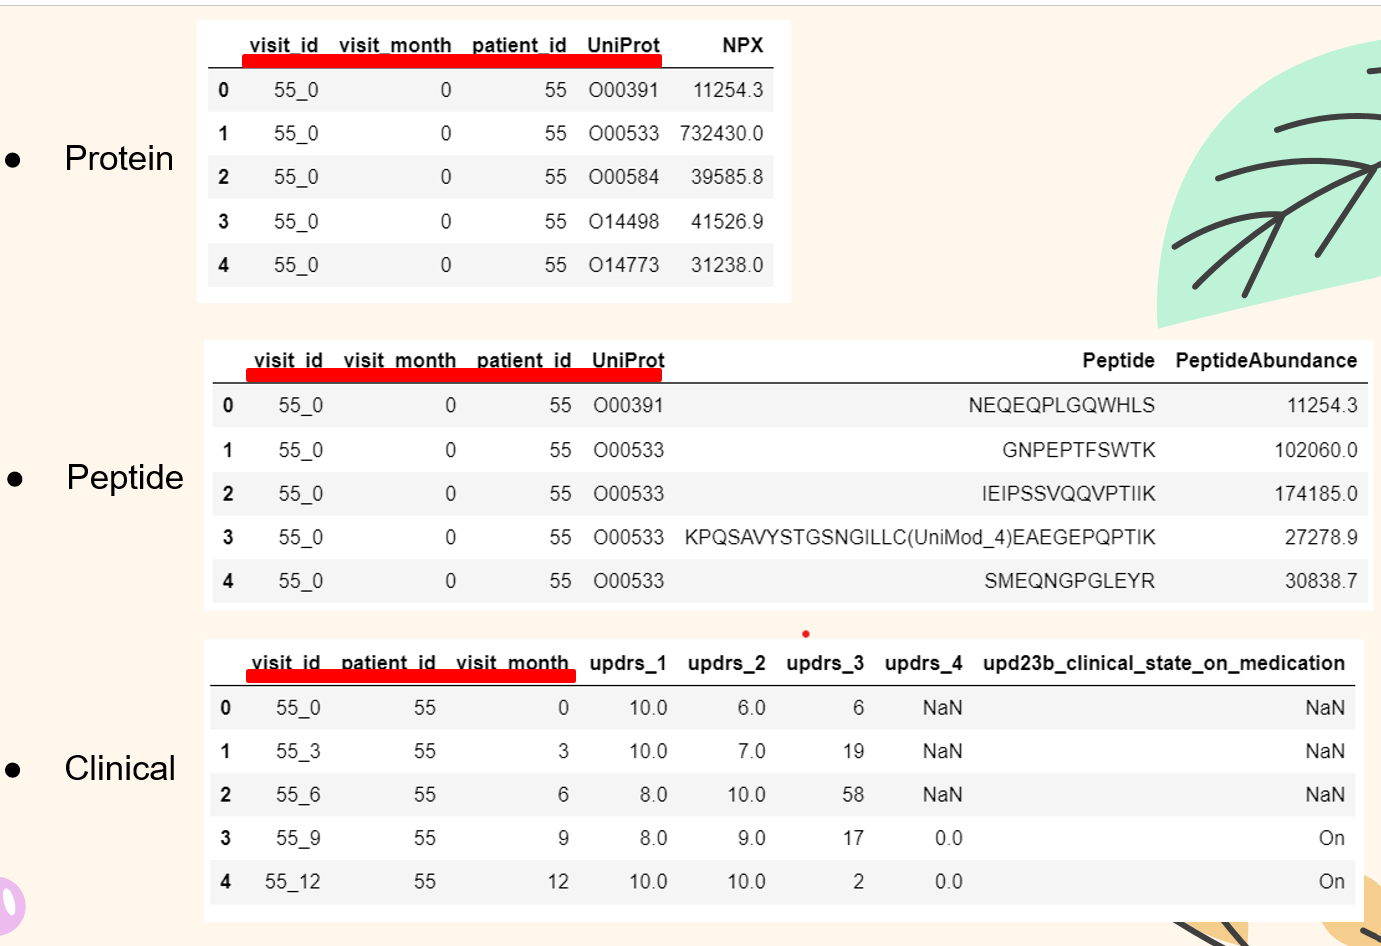

In [16]:
#Merge peptide and protein df
pep_and_pro = pd.merge(train_pep_df, train_pro_df, on = ['visit_id', 'patient_id', 'visit_month','UniProt'], how = 'left')
train_full = pd.merge(pep_and_pro, train_clinical_df, on = ['visit_id', 'patient_id', 'visit_month'], how = 'left')

In [17]:
train_full.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3,11254.3,10.0,6.0,6.0,NaN,NaN
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0,732430.0,10.0,6.0,6.0,NaN,NaN
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0,732430.0,10.0,6.0,6.0,NaN,NaN
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9,732430.0,10.0,6.0,6.0,NaN,NaN
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7,732430.0,10.0,6.0,6.0,NaN,NaN


In [18]:
train_full.dtypes

visit_id                                object
visit_month                              int64
patient_id                               int64
UniProt                                 object
Peptide                                 object
PeptideAbundance                       float64
NPX                                    float64
updrs_1                                float64
updrs_2                                float64
updrs_3                                float64
updrs_4                                float64
upd23b_clinical_state_on_medication     object
dtype: object

# Feature Engineering

- Using Label Encoder to encode **UniProt** and **Peptide**

In [19]:
train_full.dtypes

visit_id                                object
visit_month                              int64
patient_id                               int64
UniProt                                 object
Peptide                                 object
PeptideAbundance                       float64
NPX                                    float64
updrs_1                                float64
updrs_2                                float64
updrs_3                                float64
updrs_4                                float64
upd23b_clinical_state_on_medication     object
dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(train_full['UniProt'])
train_full['UniProt'] = le.transform(train_full['UniProt'])

le.fit(train_full['Peptide'])
train_full['Peptide'] = le.transform(train_full['Peptide'])

In [21]:
train_full.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,0,55,0,592,11254.3,11254.3,10.0,6.0,6.0,NaN,NaN
1,55_0,0,55,1,301,102060.0,732430.0,10.0,6.0,6.0,NaN,NaN
2,55_0,0,55,1,364,174185.0,732430.0,10.0,6.0,6.0,NaN,NaN
3,55_0,0,55,1,433,27278.9,732430.0,10.0,6.0,6.0,NaN,NaN
4,55_0,0,55,1,744,30838.7,732430.0,10.0,6.0,6.0,NaN,NaN


- Drop upd23b_clinical_state_on_medication because Testing Data doesn't have it

In [22]:
train_full = train_full.drop('upd23b_clinical_state_on_medication', axis = 1)

# Check NaN

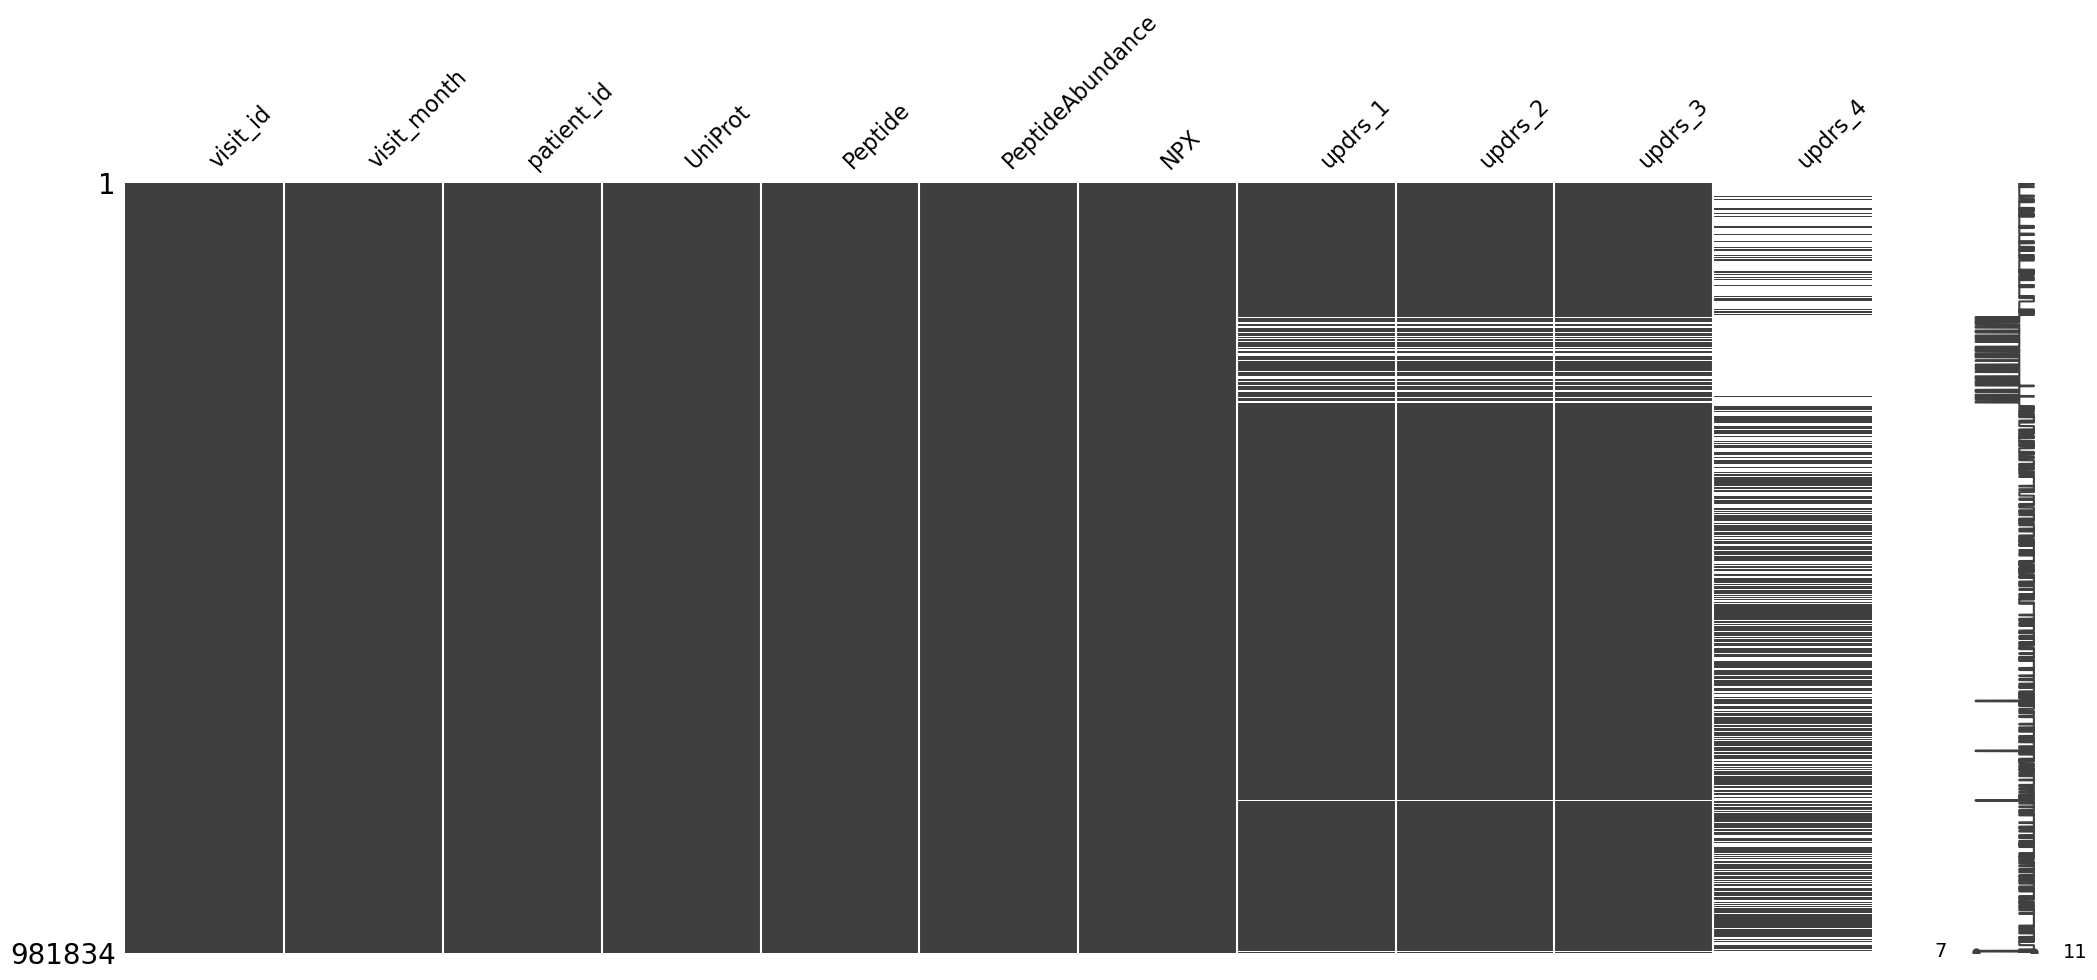

In [23]:
import missingno as msno

msno.matrix(train_full)

plt.show()

- Data in updrs_4 is missing a lot because it requires footage 

- Data in updrs 1 to 3 is missing because they didn't take the assessment

# Imputing using mean

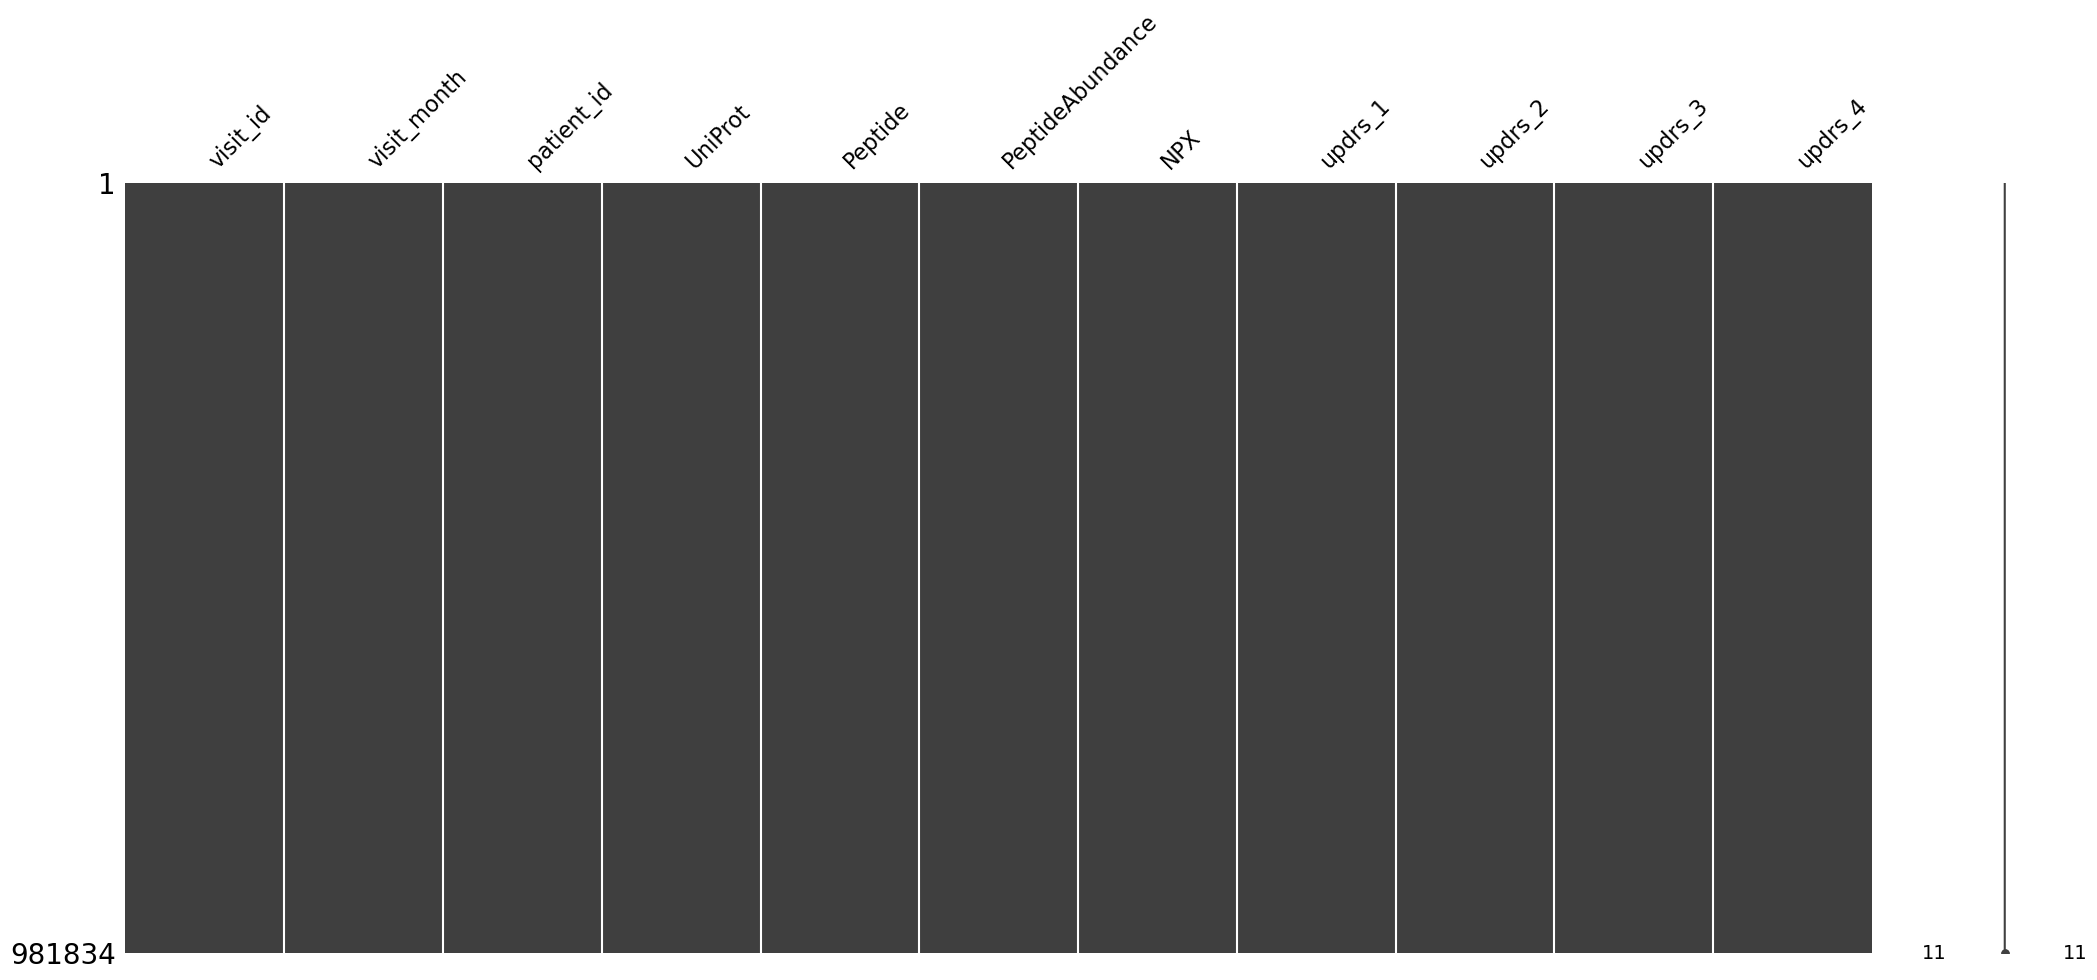

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numeric = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']

imputer.fit(train_full[numeric])

train_full[numeric] = imputer.transform(train_full[numeric])
train_full = train_full.dropna(axis=0)

msno.matrix(train_full)
plt.show()

**Melting data on updrs columns**

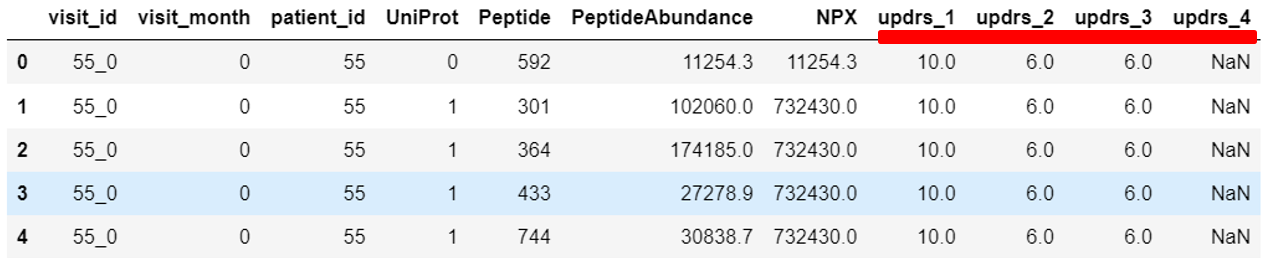

In [25]:
train_rating = train_full.melt(id_vars=['visit_id', 'patient_id', 'visit_month', 
                                       'UniProt', 'Peptide', 'PeptideAbundance', 'NPX'], var_name='updrs', value_name='rating')

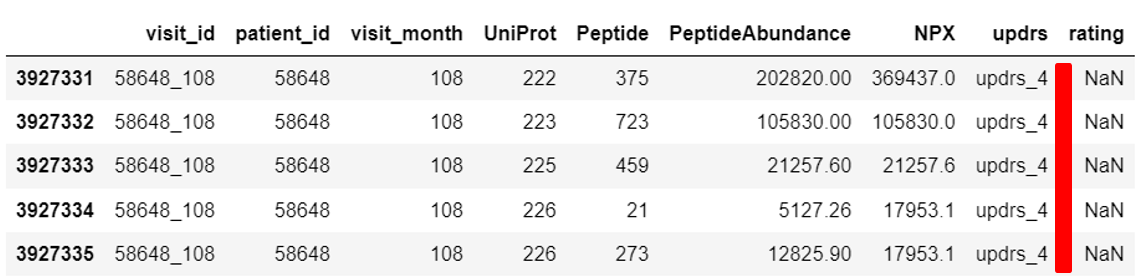

- because test set is in this format

**Label Encoding the metled data on updrs**

In [26]:
le.fit(train_rating['updrs'])
train_rating['updrs'] = le.transform(train_rating['updrs'])

train_rating.head()

,visit_id,patient_id,visit_month,UniProt,Peptide,PeptideAbundance,NPX,updrs,rating
0,55_0,55,0,0,592,11254.3,11254.3,0,10.0
1,55_0,55,0,1,301,102060.0,732430.0,0,10.0
2,55_0,55,0,1,364,174185.0,732430.0,0,10.0
3,55_0,55,0,1,433,27278.9,732430.0,0,10.0
4,55_0,55,0,1,744,30838.7,732430.0,0,10.0


# PCA

- We suspect that visit month plays the most role

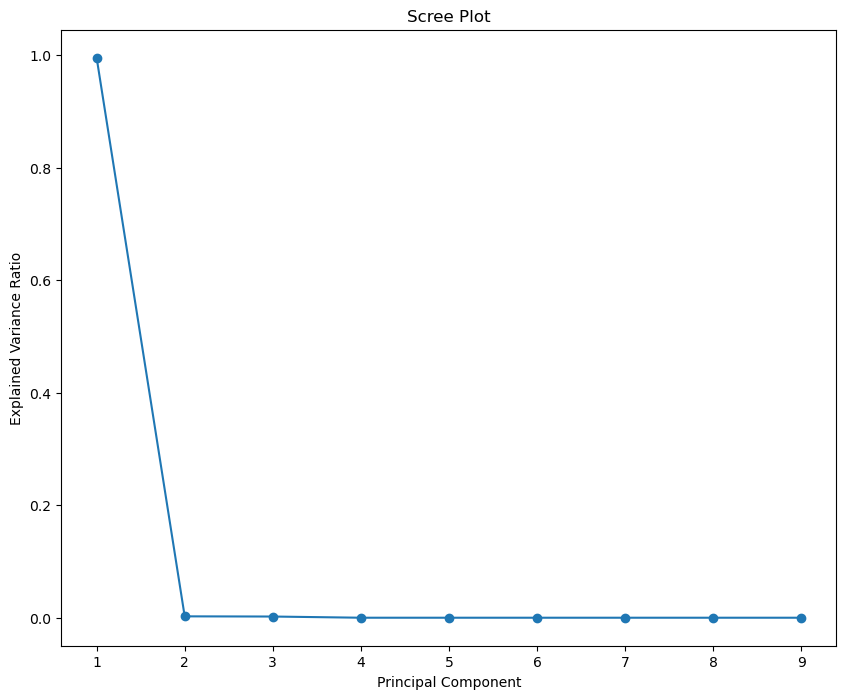

In [27]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
pca = PCA(n_components= 5)

data_scaled = scaler.fit_transform(train_rating.drop(['rating','visit_id','patient_id'], axis = 1))

X_train, X_test, y_train, y_test = train_test_split(data_scaled, train_rating['rating'], test_size=0.2, random_state=0)

######################################
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit the PCA to the data
pca = PCA().fit(train_rating)

# Plot the scree plot
plt.plot(range(1, pca.n_components_+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# --------------------------------PART 1-----------------------------


# XGBoost

In [28]:
from sklearn.model_selection import train_test_split
target = ['rating']
drops = ['visit_id', 'patient_id','rating']

X_train, X_test, y_train, y_test = train_test_split(train_rating.drop(drops, axis = 1), train_rating[target], test_size = 0.2, random_state = 42)

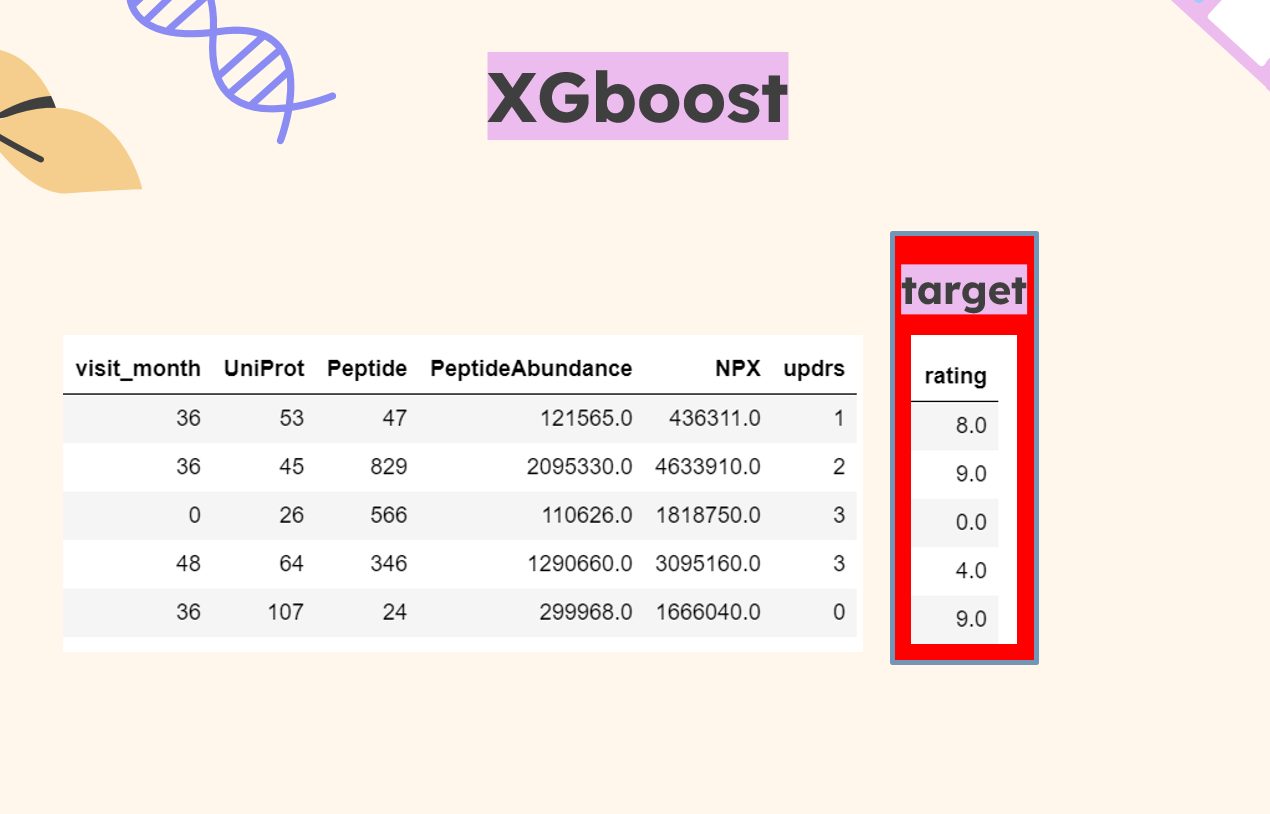

In [29]:
import xgboost as xgb

#########################

params = {
    'max_depth': 13,
    'learning_rate': 0.1,
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_jobs': -1,
}

# Create a DMatrix from the data
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)


##

xgboost = xgb.train(params=params, dtrain=dtrain, num_boost_round=100)

## Model score

In [30]:
from sklearn.metrics import r2_score

y_pred = xgboost.predict(xgb.DMatrix(X_test))

rating_list = y_test['rating'].tolist()

score = r2_score(y_pred, rating_list)

print(score)
print(y_pred)

X_test.reset_index(inplace = True)

0.8298483707445772
[5.0917454 1.9222728 4.9002886 ... 4.062962  6.4716415 5.8354974]


**RESULT DATAFRAME**

In [31]:
y_pred =  pd.Series(y_pred)

X_test['rating'] = y_pred

X_test = X_test.drop('index', axis = 1)

**Group data on visit_month and updrs**

In [32]:
result = X_test.groupby(['updrs', 'visit_month'], as_index=False).agg(lambda x: list(x))

result


,updrs,visit_month,UniProt,Peptide,PeptideAbundance,NPX,rating
0,0,0,"[155, 117, 82, 155, 31, 67, 27, 119, 63, 15, 6...","[167, 545, 195, 898, 355, 221, 914, 661, 707, ...","[249145.0, 82465.1, 207672.0, 42504.3, 166998....","[1671800.0, 154896.0, 472625.0, 1487650.0, 873...","[7.349109172821045, 5.299863815307617, 5.16120..."
1,0,3,"[178, 157, 27, 110, 59, 26, 68, 68, 101, 53, 1...","[11, 523, 639, 682, 851, 170, 12, 150, 622, 57...","[228737.0, 20758.9, 5158.5, 5664.64, 77368.2, ...","[1193300.0, 47536.6, 3014180.0, 927739.0, 1333...","[6.138393402099609, 6.1160454750061035, 6.4518..."
2,0,6,"[83, 119, 64, 100, 9, 4, 65, 64, 166, 112, 115...","[102, 811, 346, 491, 833, 483, 313, 113, 374, ...","[76114.2, 447609.0, 1612740.0, 78328.6, 113820...","[494759.0, 5979690.0, 3959430.0, 958486.0, 113...","[6.108959197998047, 6.466020584106445, 6.20492..."
3,0,12,"[79, 68, 27, 60, 99, 146, 27, 115, 22, 67, 21,...","[337, 383, 532, 369, 536, 576, 703, 206, 143, ...","[74584.6, 428300.0, 464749.0, 16326.3, 47055.3...","[1148530.0, 25616100.0, 2927900.0, 1002270.0, ...","[5.091745376586914, 5.890172004699707, 5.86480..."
4,0,18,"[68, 110, 67, 60, 149, 160, 54, 23, 27, 27, 11...","[341, 108, 332, 262, 366, 178, 284, 694, 630, ...","[2118370.0, 22181.6, 9543.04, 155718.0, 17445....","[45834800.0, 1619320.0, 2730510.0, 1436820.0, ...","[5.47597074508667, 4.73132848739624, 3.6537091..."
5,0,24,"[66, 49, 17, 100, 141, 75, 60, 17, 120, 27, 27...","[876, 927, 756, 140, 266, 336, 796, 962, 618, ...","[6411080.0, 531515.0, 586685.0, 36926.5, 69087...","[237969000.0, 15466800.0, 5298270.0, 1478320.0...","[6.228898048400879, 6.478208065032959, 7.84854..."
6,0,30,"[75, 121, 164, 65, 88, 202, 2, 222, 64, 92, 11...","[336, 147, 152, 313, 906, 224, 329, 14, 346, 6...","[126753.0, 59607.0, 22547.5, 5392560.0, 3698.7...","[336942.0, 59607.0, 22547.5, 28644700.0, 3698....","[13.793062210083008, 13.582202911376953, 13.55..."
7,0,36,"[68, 22, 27, 117, 95, 22, 25, 79, 71, 176, 226...","[434, 51, 189, 545, 390, 755, 839, 511, 405, 8...","[3260740.0, 474939.0, 224007.0, 73682.8, 32073...","[39884800.0, 2495040.0, 4100250.0, 100999.0, 6...","[6.404375076293945, 7.322030544281006, 7.36020..."
8,0,48,"[162, 18, 99, 66, 221, 224, 55, 45, 224, 162, ...","[695, 684, 27, 416, 112, 430, 663, 130, 430, 1...","[19229.5, 48496.3, 52154.0, 979998.0, 4485.98,...","[376124.0, 83991.6, 235908.0, 268948000.0, 363...","[6.644120216369629, 6.814990520477295, 7.03345..."
9,0,54,"[27, 45, 209, 27, 17, 49, 119, 40, 16, 64, 58,...","[436, 130, 397, 384, 873, 492, 812, 860, 598, ...","[44533.0, 1090310.0, 64299.4, 200858.0, 274102...","[2265270.0, 3600490.0, 64299.4, 2265270.0, 147...","[8.381755828857422, 6.477883815765381, 7.07294..."


# Regression

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

target = ['rating']
drops = ['visit_id', 'patient_id','rating']

X_train, X_test, y_train, y_test = train_test_split(train_rating.drop(drops, axis=1), train_rating[target], test_size=0.2, random_state=42)

# Initialize the Ridge regression model
ridge_regressor = Ridge(alpha=0.1, normalize=True)

# Fit the model on the training data
ridge_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_regressor.predict(X_test)

# Calculate the evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print('R-squared (r2) score:', r2)
print('Mean squared error (MSE):', mse)


R-squared (r2) score: 0.007867304129271169
Mean squared error (MSE): 151.45106008161318


# Random Forest

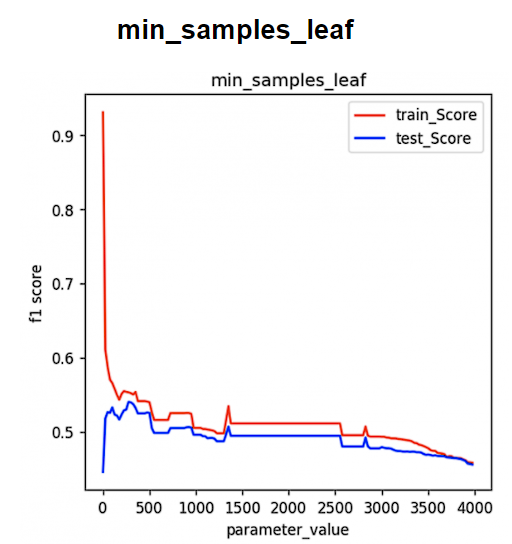
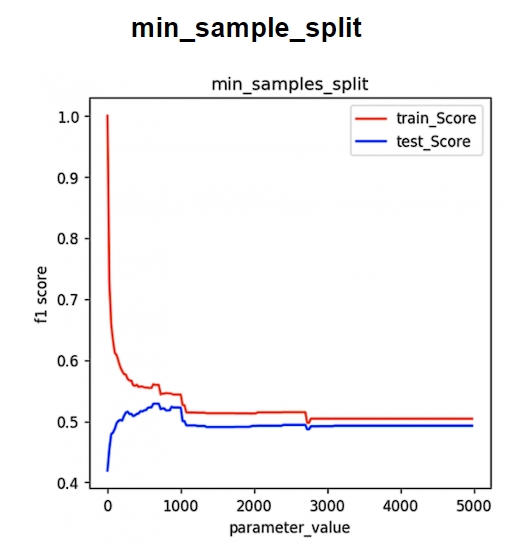
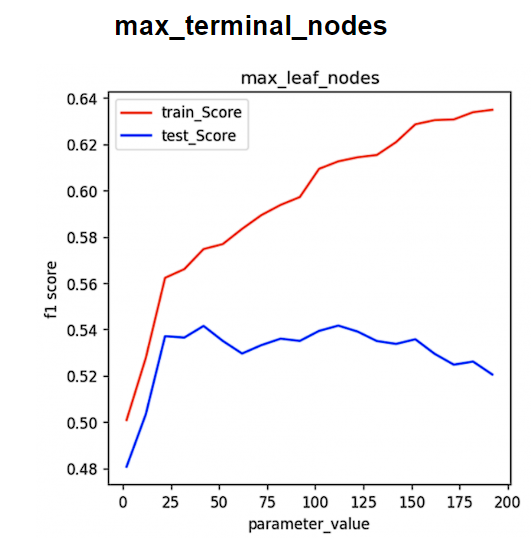
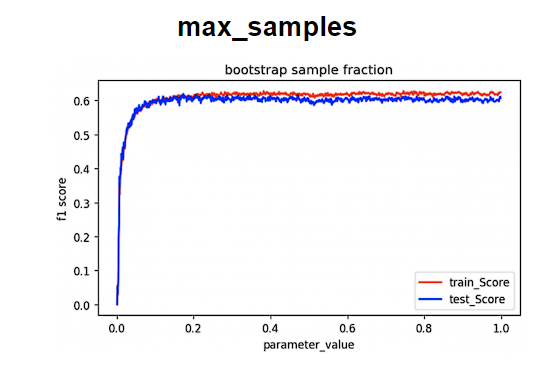
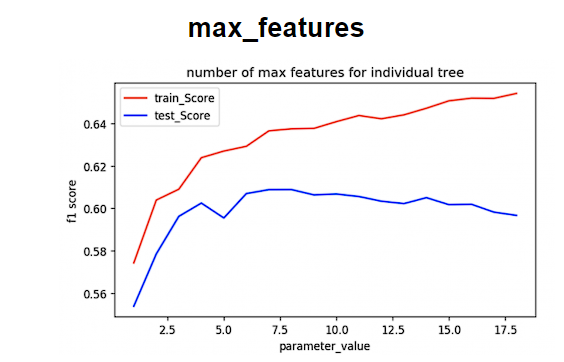
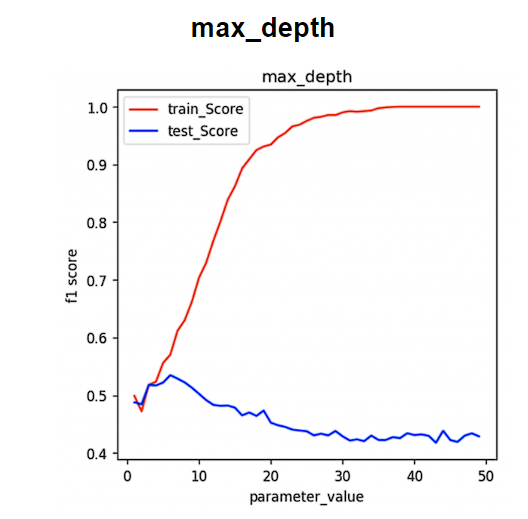
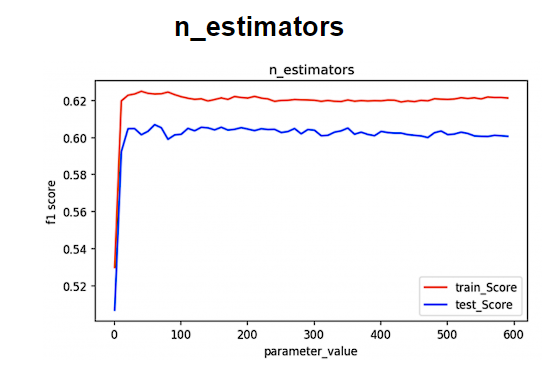

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
target = ['rating']
drops = ['visit_id', 'patient_id','rating']

X_train, X_test, y_train, y_test = train_test_split(train_rating.drop(drops, axis = 1), train_rating[target], test_size = 0.2, random_state = 42)


# Initialize the Random Forest regressor with 3 trees
rf_regressor = RandomForestRegressor(n_estimators=3, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

In [35]:
# Calculate the R-squared score and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared score:', r2)
print('Mean squared error:', mse)

R-squared score: 0.9099469717158502
Mean squared error: 13.746776670054478


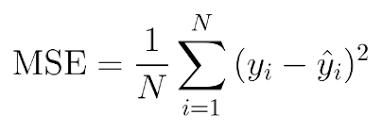

# ----------------

In [36]:
result = X_test.groupby(['updrs', 'visit_month'], as_index=False).agg(lambda x: list(x))

result


,updrs,visit_month,UniProt,Peptide,PeptideAbundance,NPX
0,0,0,"[155, 117, 82, 155, 31, 67, 27, 119, 63, 15, 6...","[167, 545, 195, 898, 355, 221, 914, 661, 707, ...","[249145.0, 82465.1, 207672.0, 42504.3, 166998....","[1671800.0, 154896.0, 472625.0, 1487650.0, 873..."
1,0,3,"[178, 157, 27, 110, 59, 26, 68, 68, 101, 53, 1...","[11, 523, 639, 682, 851, 170, 12, 150, 622, 57...","[228737.0, 20758.9, 5158.5, 5664.64, 77368.2, ...","[1193300.0, 47536.6, 3014180.0, 927739.0, 1333..."
2,0,6,"[83, 119, 64, 100, 9, 4, 65, 64, 166, 112, 115...","[102, 811, 346, 491, 833, 483, 313, 113, 374, ...","[76114.2, 447609.0, 1612740.0, 78328.6, 113820...","[494759.0, 5979690.0, 3959430.0, 958486.0, 113..."
3,0,12,"[79, 68, 27, 60, 99, 146, 27, 115, 22, 67, 21,...","[337, 383, 532, 369, 536, 576, 703, 206, 143, ...","[74584.6, 428300.0, 464749.0, 16326.3, 47055.3...","[1148530.0, 25616100.0, 2927900.0, 1002270.0, ..."
4,0,18,"[68, 110, 67, 60, 149, 160, 54, 23, 27, 27, 11...","[341, 108, 332, 262, 366, 178, 284, 694, 630, ...","[2118370.0, 22181.6, 9543.04, 155718.0, 17445....","[45834800.0, 1619320.0, 2730510.0, 1436820.0, ..."
5,0,24,"[66, 49, 17, 100, 141, 75, 60, 17, 120, 27, 27...","[876, 927, 756, 140, 266, 336, 796, 962, 618, ...","[6411080.0, 531515.0, 586685.0, 36926.5, 69087...","[237969000.0, 15466800.0, 5298270.0, 1478320.0..."
6,0,30,"[75, 121, 164, 65, 88, 202, 2, 222, 64, 92, 11...","[336, 147, 152, 313, 906, 224, 329, 14, 346, 6...","[126753.0, 59607.0, 22547.5, 5392560.0, 3698.7...","[336942.0, 59607.0, 22547.5, 28644700.0, 3698...."
7,0,36,"[68, 22, 27, 117, 95, 22, 25, 79, 71, 176, 226...","[434, 51, 189, 545, 390, 755, 839, 511, 405, 8...","[3260740.0, 474939.0, 224007.0, 73682.8, 32073...","[39884800.0, 2495040.0, 4100250.0, 100999.0, 6..."
8,0,48,"[162, 18, 99, 66, 221, 224, 55, 45, 224, 162, ...","[695, 684, 27, 416, 112, 430, 663, 130, 430, 1...","[19229.5, 48496.3, 52154.0, 979998.0, 4485.98,...","[376124.0, 83991.6, 235908.0, 268948000.0, 363..."
9,0,54,"[27, 45, 209, 27, 17, 49, 119, 40, 16, 64, 58,...","[436, 130, 397, 384, 873, 492, 812, 860, 598, ...","[44533.0, 1090310.0, 64299.4, 200858.0, 274102...","[2265270.0, 3600490.0, 64299.4, 2265270.0, 147..."


- Each UniProt, Peptide, PeptideAbundance, NPX row has its own prediction

# Predict Test Set

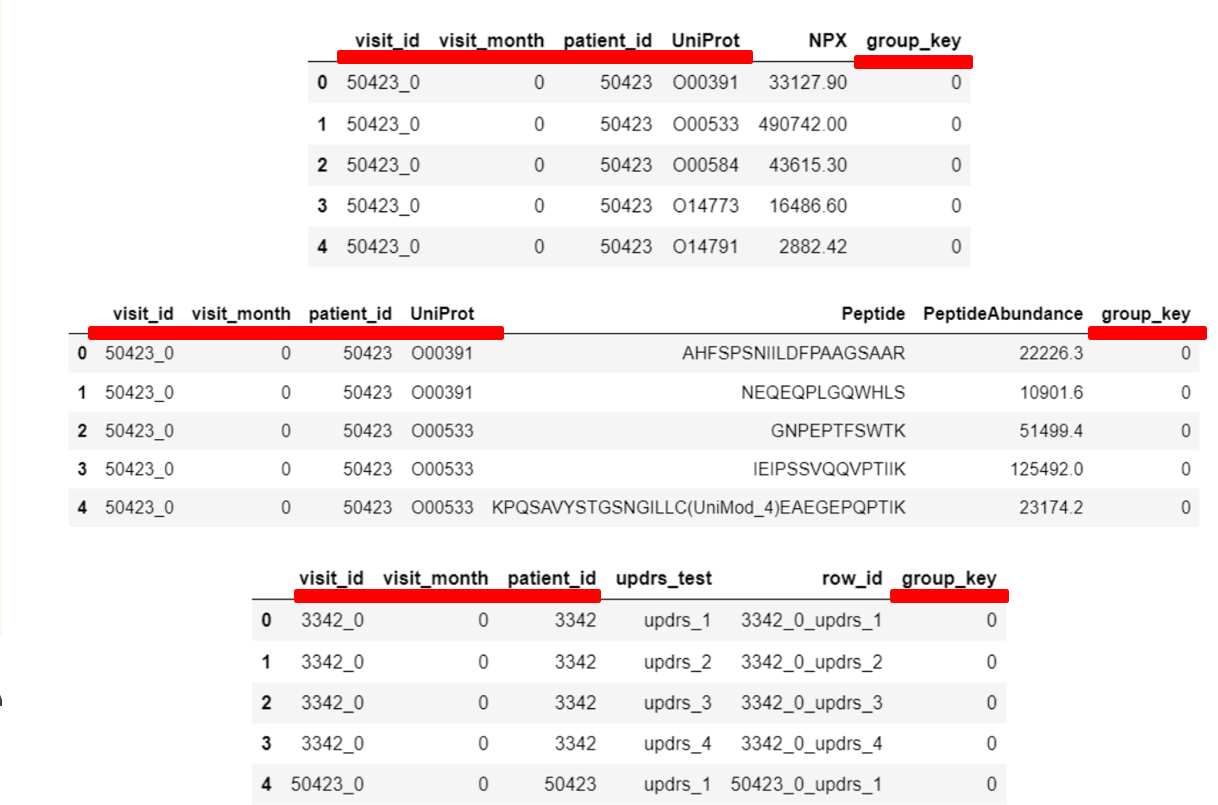

In [37]:
#LOAD TEST SET
test = pd.read_csv(r'C:\Users\broke\OneDrive\Desktop\amp-pd\example_test_files\test.csv')
test_peptides = pd.read_csv(r'C:\Users\broke\OneDrive\Desktop\amp-pd\example_test_files\test_peptides.csv')
test_proteins = pd.read_csv(r'C:\Users\broke\OneDrive\Desktop\amp-pd\example_test_files\test_proteins.csv')
sub_test = pd.read_csv(r'C:\Users\broke\OneDrive\Desktop\amp-pd\example_test_files\sample_submission.csv')

#MERGE TEST SET
test_and_testPep = pd.merge(test_peptides, test_proteins, on = ['visit_id', 'patient_id', 'visit_month','UniProt','group_key'], how = 'left')
test_and_testPep = pd.merge(test_and_testPep, test, on = ['visit_id', 'patient_id', 'visit_month','group_key'], how = 'left')

test_and_testPep.drop(['row_id', 'group_key'], axis = 1, inplace = True)
test_and_testPep.rename(columns={"updrs_test": "updrs"}, inplace=True)


# test_and_testPep = test_and_testPep.groupby(['updrs', 'visit_month','visit_id','patient_id'], as_index=False).agg(lambda x: list(x))

test_and_testPep


,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs
0,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.30,33127.9,updrs_1
1,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.30,33127.9,updrs_2
2,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.30,33127.9,updrs_3
3,50423_0,0,50423,O00391,AHFSPSNIILDFPAAGSAAR,22226.30,33127.9,updrs_4
4,50423_0,0,50423,O00391,NEQEQPLGQWHLS,10901.60,33127.9,updrs_1
...,...,...,...,...,...,...,...,...
8223,3342_6,6,3342,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,4253.17,14624.5,updrs_4
8224,3342_6,6,3342,Q9Y6R7,GATTSPGVYELSSR,10371.30,14624.5,updrs_1
8225,3342_6,6,3342,Q9Y6R7,GATTSPGVYELSSR,10371.30,14624.5,updrs_2
8226,3342_6,6,3342,Q9Y6R7,GATTSPGVYELSSR,10371.30,14624.5,updrs_3


## Feature enginering for test set

In [38]:
test_and_testPep['UniProt'] = le.fit_transform(test_and_testPep['UniProt'])

test_and_testPep['Peptide'] = le.fit_transform(test_and_testPep['Peptide'])

test_and_testPep['updrs'] = le.fit_transform(test_and_testPep['updrs'])

test_and_testPep

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs
0,50423_0,0,50423,0,31,22226.30,33127.9,0
1,50423_0,0,50423,0,31,22226.30,33127.9,1
2,50423_0,0,50423,0,31,22226.30,33127.9,2
3,50423_0,0,50423,0,31,22226.30,33127.9,3
4,50423_0,0,50423,0,649,10901.60,33127.9,0
...,...,...,...,...,...,...,...,...
8223,3342_6,6,3342,235,25,4253.17,14624.5,3
8224,3342_6,6,3342,235,294,10371.30,14624.5,0
8225,3342_6,6,3342,235,294,10371.30,14624.5,1
8226,3342_6,6,3342,235,294,10371.30,14624.5,2


In [39]:
test_and_testPep_pred = test_and_testPep.drop(['visit_id', 'patient_id'], axis = 1)

## Predict test set at month 0

In [40]:
pred = xgboost.predict((xgb.DMatrix(test_and_testPep_pred)))

pred

array([ 4.4474792,  4.028304 ,  6.299421 , ...,  7.3554497, 44.350548 ,
        1.8380923], dtype=float32)

In [41]:
test_and_testPep['rating'] = pd.Series(pred)

In [42]:
test_and_testPep

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs,rating
0,50423_0,0,50423,0,31,22226.30,33127.9,0,4.447479
1,50423_0,0,50423,0,31,22226.30,33127.9,1,4.028304
2,50423_0,0,50423,0,31,22226.30,33127.9,2,6.299421
3,50423_0,0,50423,0,31,22226.30,33127.9,3,2.188550
4,50423_0,0,50423,0,649,10901.60,33127.9,0,5.103675
...,...,...,...,...,...,...,...,...,...
8223,3342_6,6,3342,235,25,4253.17,14624.5,3,1.838258
8224,3342_6,6,3342,235,294,10371.30,14624.5,0,6.463050
8225,3342_6,6,3342,235,294,10371.30,14624.5,1,7.355450
8226,3342_6,6,3342,235,294,10371.30,14624.5,2,44.350548


In [43]:
final = test_and_testPep.groupby(['visit_id', 'visit_month','patient_id', 'updrs'], as_index=False).agg(lambda x: list(x))

final = final.drop(['visit_id','UniProt','Peptide', 'PeptideAbundance', 'NPX'], axis = 1)

final['rating'] = final['rating'].apply(lambda x: np.mean(x).round())

final['visit_month'] = 0

final['updrs'] += 1

final = final.groupby(['patient_id', 'visit_month'], as_index=False).agg(lambda x: list(x))

final.head()

,patient_id,visit_month,updrs,rating
0,3342,0,"[1, 2, 3, 4]","[6.0, 7.0, 46.0, 2.0]"
1,50423,0,"[1, 2, 3, 4]","[5.0, 4.0, 6.0, 2.0]"


Problem
--------------------
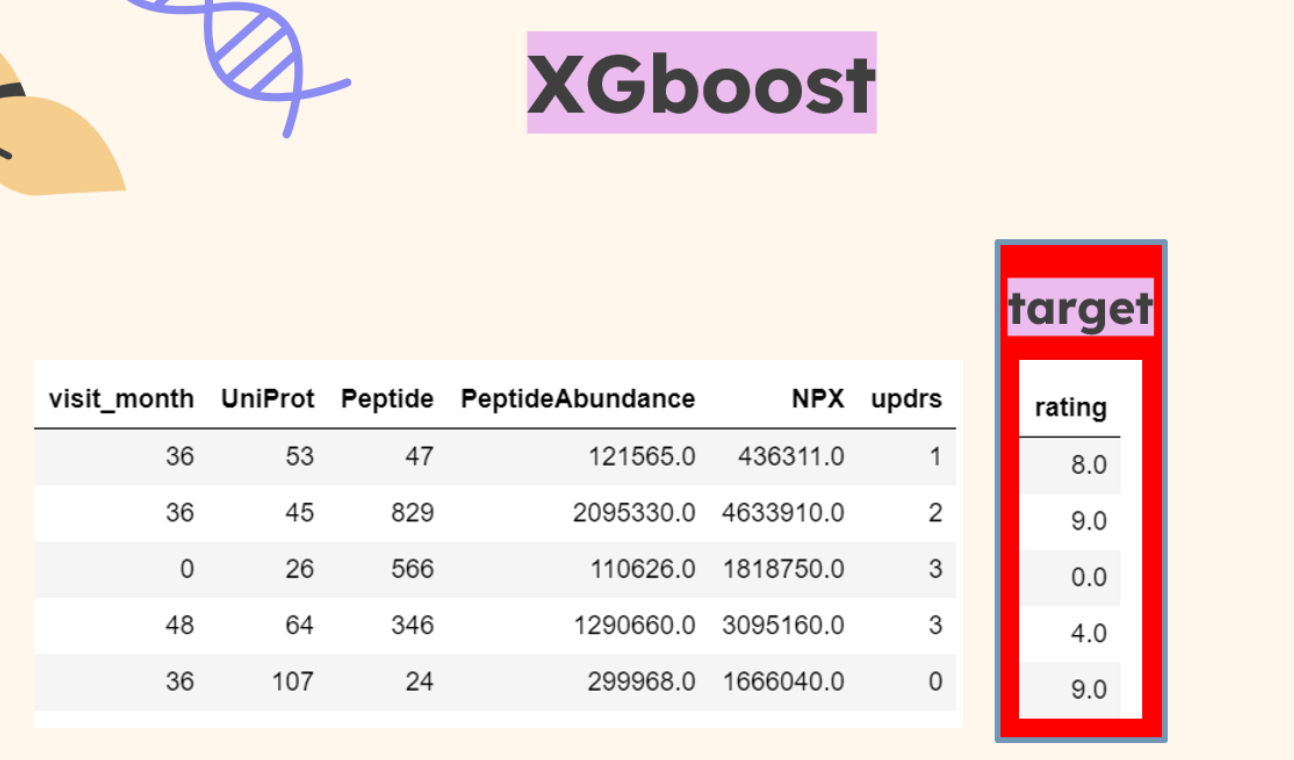

## test set

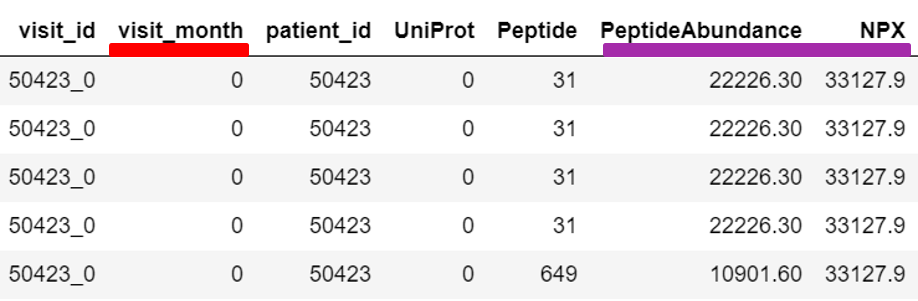


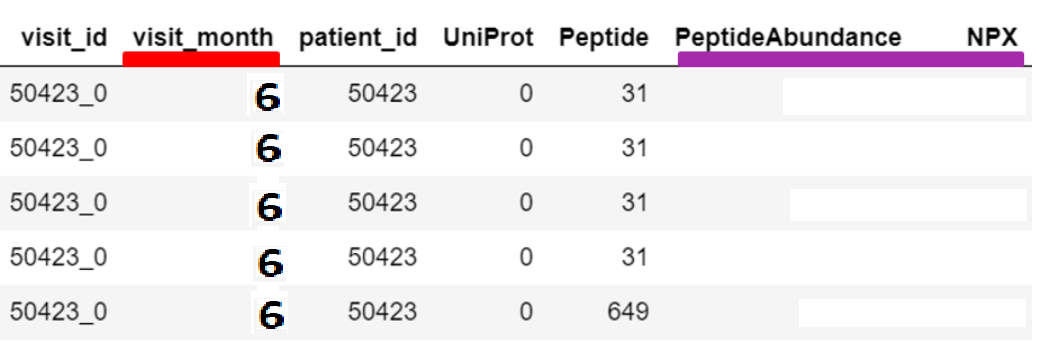



-Only data from month 0 is provided in test set but we have to predict 6,12,18,24

-Have to predict how data change overtime by ourself --> Use another model to predict



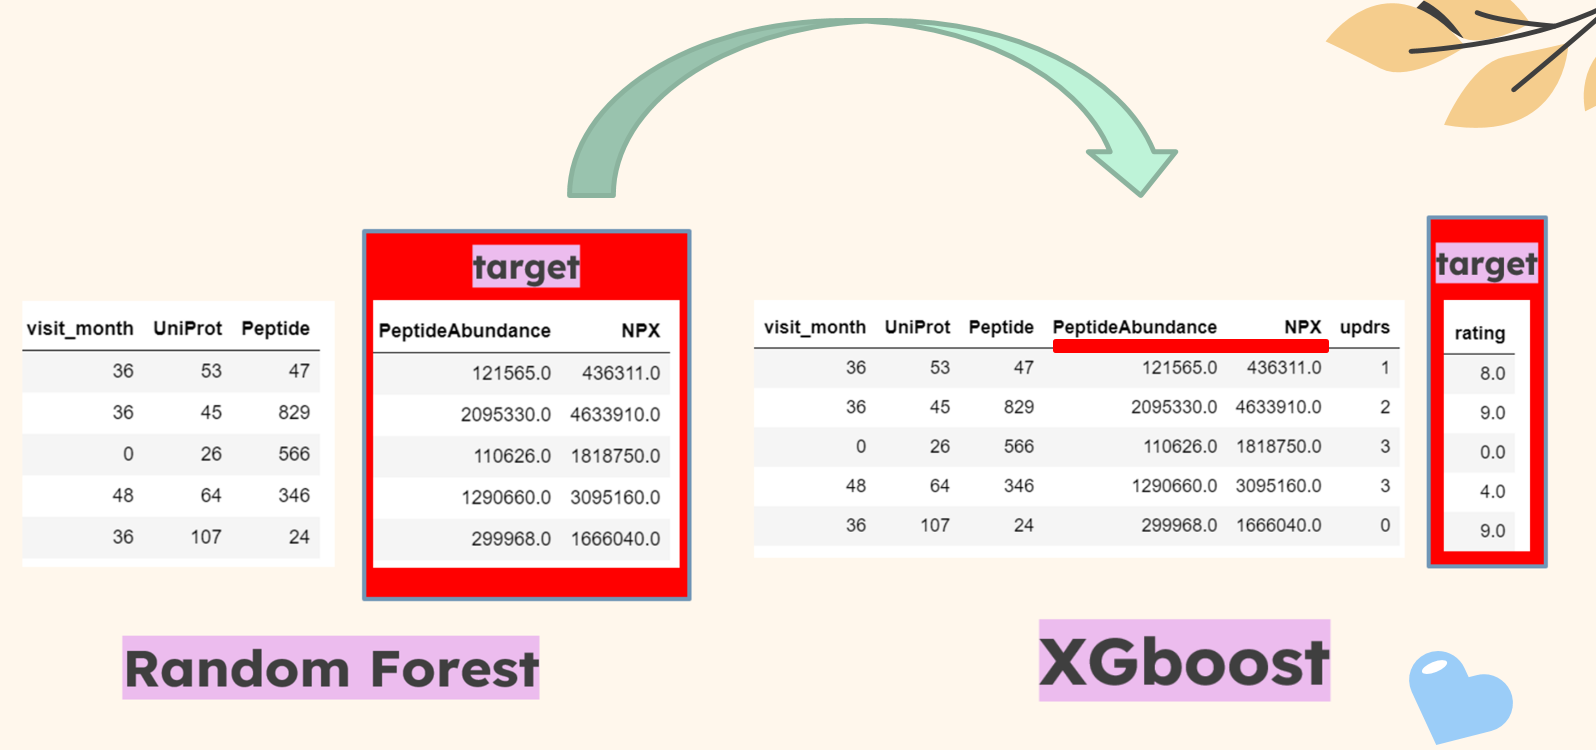



**We take other infomations from month 0:**
-------------------
-visit month

-UniProt

-Peptide

--------------------
And then replace the month to [6,12,18,24] then try to extrapolate info like
--------------------


-PeptideAbundance

-NPX



# --------------------------------PART 2-----------------------------


# Random Forest Extrapolate 🌳

- use the same data we trained Xgboost to train Random Forest but with different target

In [44]:
train_rating.head()

,visit_id,patient_id,visit_month,UniProt,Peptide,PeptideAbundance,NPX,updrs,rating
0,55_0,55,0,0,592,11254.3,11254.3,0,10.0
1,55_0,55,0,1,301,102060.0,732430.0,0,10.0
2,55_0,55,0,1,364,174185.0,732430.0,0,10.0
3,55_0,55,0,1,433,27278.9,732430.0,0,10.0
4,55_0,55,0,1,744,30838.7,732430.0,0,10.0


## Model

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split


target = ['PeptideAbundance', 'NPX']
drops = ['visit_id', 'patient_id','rating', 'rating','PeptideAbundance', 'NPX']

X_train, X_test, y_train, y_test = train_test_split(train_rating.drop(drops, axis = 1), train_rating[target], test_size = 0.2, random_state = 42)


# Initialize the Random Forest regressor with 3 trees
rf_regressor = RandomForestRegressor(n_estimators=3, random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

In [46]:
# Calculate the R-squared score and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared score:', r2)
print('Mean squared error:', mse)

R-squared score: 0.9403786282965759
Mean squared error: 87997113447656.36


**EXTRAPOLATING**

In [47]:
test_and_testPep

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs,rating
0,50423_0,0,50423,0,31,22226.30,33127.9,0,4.447479
1,50423_0,0,50423,0,31,22226.30,33127.9,1,4.028304
2,50423_0,0,50423,0,31,22226.30,33127.9,2,6.299421
3,50423_0,0,50423,0,31,22226.30,33127.9,3,2.188550
4,50423_0,0,50423,0,649,10901.60,33127.9,0,5.103675
...,...,...,...,...,...,...,...,...,...
8223,3342_6,6,3342,235,25,4253.17,14624.5,3,1.838258
8224,3342_6,6,3342,235,294,10371.30,14624.5,0,6.463050
8225,3342_6,6,3342,235,294,10371.30,14624.5,1,7.355450
8226,3342_6,6,3342,235,294,10371.30,14624.5,2,44.350548


# -------------------------------------------------------------


- We keep UniProt, Peptide from month 0 because they don't change

- We duplicate **UniProt, Peptide** for each time visit: 6, 12, 18, 24


# Patient 1

In [48]:
Patient_1_month_0 = test_and_testPep[test_and_testPep['visit_id'] == '50423_0'] 
Patient_1_month_0

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance,NPX,updrs,rating
0,50423_0,0,50423,0,31,22226.30,33127.9,0,4.447479
1,50423_0,0,50423,0,31,22226.30,33127.9,1,4.028304
2,50423_0,0,50423,0,31,22226.30,33127.9,2,6.299421
3,50423_0,0,50423,0,31,22226.30,33127.9,3,2.188550
4,50423_0,0,50423,0,649,10901.60,33127.9,0,5.103675
...,...,...,...,...,...,...,...,...,...
4079,50423_0,0,50423,235,25,9061.07,42920.4,3,1.717454
4080,50423_0,0,50423,235,294,33859.30,42920.4,0,5.631650
4081,50423_0,0,50423,235,294,33859.30,42920.4,1,5.114093
4082,50423_0,0,50423,235,294,33859.30,42920.4,2,6.068372


In [49]:
Patient_1_month_0 = test_and_testPep[test_and_testPep['visit_id'] == '50423_0'] #visit_id of first patient
months = [6,12,18,24] #month lists
Progression = []
Result_6_to_24 = []

# We will take data of the first patient - '50423' using his visit_id
# Replace visit_month with whatever month in month lists
# Use RandomForestRegressor to extrapolate data from month 6 to 24
# Use the extrapolated data to feed Xgboost model to get the ratings

for month in months:
    
    variable = Patient_1_month_0.drop(['visit_id', 'patient_id', 'PeptideAbundance','NPX','rating'], axis = 1 )
    variable['visit_month'] = month
    
    #Predict data for corresponding month
    y_pred = rf_regressor.predict(variable)
    y_pred = pd.DataFrame(y_pred)
    

    #Combine predicted data 
    variable['PeptideAbundance'] = y_pred.iloc[:, 0]
    variable['NPX'] = y_pred.iloc[:, 1]

    column_to_move = variable.pop('updrs')
    variable.insert(5, 'updrs', column_to_move)
    
    Progression.append(variable)
    
for data in Progression:
    
    pred = xgboost.predict(xgb.DMatrix(data))
    data['rating'] = pred
    
    
    test = data.groupby(['visit_month','updrs'], as_index=False).agg(lambda x: list(x))

    test['rating'] = test['rating'].apply(lambda x: abs(np.mean(x)).round(2))
    
    test['updrs'] = test['updrs'] + 1

    test = test.drop(['UniProt', 'Peptide', 'PeptideAbundance', 'NPX'], axis = 1)
    
    test['patient_id'] = '50423'
    
    Result_6_to_24.append(test)

In [50]:
grouped = []
for df in Result_6_to_24:
    df = df.groupby(['patient_id','visit_month'], as_index=False).agg(lambda x: list(x))
    grouped.append(df)

In [51]:
for df in grouped:
    print(df)
    print('------------------------')

  patient_id  visit_month         updrs                    rating
0      50423            6  [1, 2, 3, 4]  [6.5, 7.37, 45.39, 1.87]
------------------------
  patient_id  visit_month         updrs                    rating
0      50423           12  [1, 2, 3, 4]  [6.37, 5.51, 1.98, 1.68]
------------------------
  patient_id  visit_month         updrs                    rating
0      50423           18  [1, 2, 3, 4]  [4.33, 4.14, 6.99, 0.41]
------------------------
  patient_id  visit_month         updrs                    rating
0      50423           24  [1, 2, 3, 4]  [6.56, 5.71, 16.0, 1.86]
------------------------


# Patient 2

In [52]:
Patient_1_month_0 = test_and_testPep[test_and_testPep['visit_id'] == '3342_6']
months = [6,12,18,24]
Progression = []
Result_6_to_24 = []
for month in months:
    
    variable = Patient_1_month_0.drop(['visit_id', 'patient_id', 'PeptideAbundance','NPX','rating'], axis = 1 )
    variable['visit_month'] = month
    
    y_pred = rf_regressor.predict(variable)
    y_pred = pd.DataFrame(y_pred)
    
    
    variable['PeptideAbundance'] = y_pred.iloc[:, 0]
    variable['NPX'] = y_pred.iloc[:, 1]

    column_to_move = variable.pop('updrs')
    variable.insert(5, 'updrs', column_to_move)
    
    Progression.append(variable)
    
for data in Progression:
    
    pred = xgboost.predict(xgb.DMatrix(data))
    data['rating'] = pred
    
    
    test = data.groupby(['visit_month','updrs'], as_index=False).agg(lambda x: list(x))

    test['rating'] = test['rating'].apply(lambda x: abs(np.mean(x)).round(2))
    
    test['updrs'] = test['updrs'] + 1

    test = test.drop(['UniProt', 'Peptide', 'PeptideAbundance', 'NPX'], axis = 1)
    
    test['patient_id'] = '3342'
    
    Result_6_to_24.append(test)


In [53]:
grouped = []
for df in Result_6_to_24:
    df = df.groupby(['patient_id','visit_month'], as_index=False).agg(lambda x: list(x))
    grouped.append(df)

In [54]:
for df in grouped:
    print(df)
    print('------------------------')

  patient_id  visit_month         updrs                    rating
0       3342            6  [1, 2, 3, 4]  [6.19, 6.88, 49.2, 2.29]
------------------------
  patient_id  visit_month         updrs                    rating
0       3342           12  [1, 2, 3, 4]  [6.04, 5.58, 1.94, 2.46]
------------------------
  patient_id  visit_month         updrs                    rating
0       3342           18  [1, 2, 3, 4]  [3.45, 3.95, 6.87, 0.37]
------------------------
  patient_id  visit_month         updrs                     rating
0       3342           24  [1, 2, 3, 4]  [6.88, 6.46, 15.98, 1.76]
------------------------


We can see that the score has a lot of ups and downs just like we expected from the training dataset!

Scores are pretty much the same except for **updrs4**

## Sample prediction:

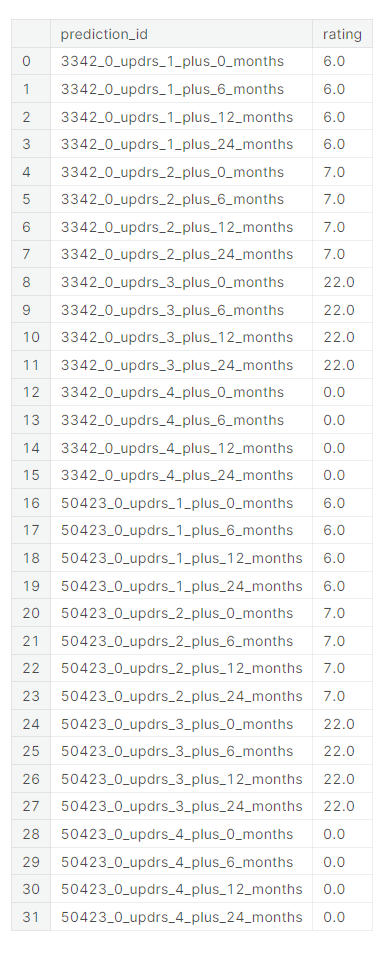

In [55]:
from IPython.display import Image

Image(url="https://media.tenor.com/MzaiHA_y0kIAAAAM/thank-you-thanks.gif", width=400)
